In [0]:
#setting up fastai
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [0]:
#downloading the custom dataset in colab
! git clone https://github.com/Priyansi/donaldTrump-borisJohnson-classifier.git

fatal: destination path 'donaldTrump-borisJohnson-classifier' already exists and is not an empty directory.


#Looking At Data

In [0]:
#setting path for colab
#may be different for you
path='/content/donaldTrump-borisJohnson-classifier/dataset'

In [0]:
np.random.seed(24) #dataset splits randomly
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=299, bs=32).normalize(imagenet_stats) 

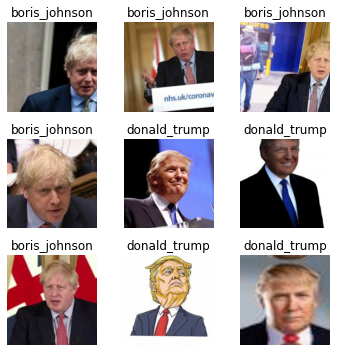

In [0]:
#making sure the data's alright
data.show_batch(rows=3, figsize=(5, 5))

#Training : ResNet50

In [0]:
#downloading the resnet50 model
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [0]:
#fitting first without tweaking
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.696695,0.548813,0.159664,00:09
1,0.581087,0.227606,0.075630,00:09
2,0.482848,0.238170,0.067227,00:09
3,0.387584,0.222790,0.058824,00:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


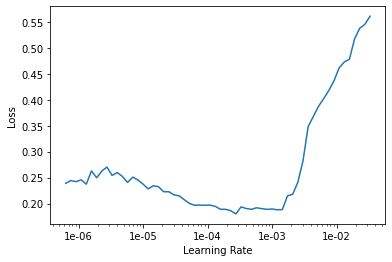

In [0]:
#relearning by finding appropriate learning rate
learn.unfreeze() 
learn.lr_find()
learn.recorder.plot()

In [0]:
#fitting again with new parameters
learn.fit_one_cycle(4, max_lr=slice(3e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.214266,0.238435,0.050420,00:10
1,0.224618,0.131761,0.042017,00:10
2,0.203598,0.067730,0.016807,00:10
3,0.163798,0.047515,0.025210,00:10


In [0]:
#saving results
learn.save('stage-1')

#Interpreting Results

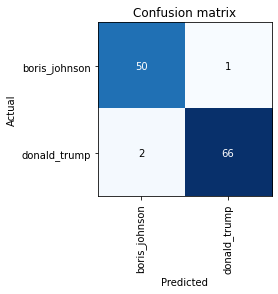

In [0]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


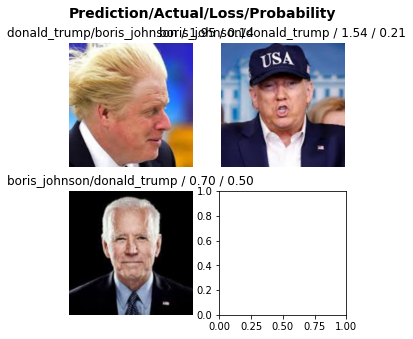

In [0]:
interpret.plot_top_losses(3, figsize=(5,5))